<a href="https://colab.research.google.com/github/nabilaaryanti/Clustering/blob/main/Employment_by_Industry_and_Occupation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step Data Mining :
- Data Understanding
- Preprocessing
- Modeling
- Evaluation

# Preprocessing Data

In [ ]:
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

## Dataset

Data yang digunakan adalah data Employment by Industry

In [ ]:
datain = pd.read_csv('https:/content/employmentbyindustry.csv')
dataoc = pd.read_csv('https:/content/employmentbyoccupation.csv')

In [ ]:
datain.head()

,Countries,Year(s),"Agriculture, Fishery & Forestry",Manufacturing,Construction,"Whole sales & Retail Trade, Restaurants, & Hotels","Transportation, Storage, Communication","Finance, Insurance, Real Estate and Business Services",Public Services,"Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)",Source
0,Brunei Darussalam,1995.0,2.0,5.8,50.4,15.6,5.7,6.8,5.6,7.9,ASEAN Secretariat
1,Brunei Darussalam,2000.0,0.6,3.8,7.4,17.3,5.1,8.8,43.6,13.4,NaN
2,Cambodia,2003.0,64.8,9.1,2.1,12.8,2.7,0.3,7.8,0.3,ASEAN Secretariat
3,Cambodia,2004.0,60.3,9.5,2.6,14.5,2.6,0.4,9.7,0.4,NaN
4,Cambodia,2014.0,54.9,13.1,5.0,17.0,4.5,0.4,3.3,1.9,NaN


In [ ]:
dataoc.head()

,Countries,Year(s),"Professionals, technical and related workers","Administrative, executive and managerial workers",Clerical and related workers,Sales workers and services workers,"Agricultural, animal husbandry and forestry workers; fishermen and hunters","Production and related workers, transport equipment operators and labourers",Others,Source
0,Brunei Darussalam,2014.0,33.2,7.6,11.4,19.5,1.4,13.0,13.9,ASEAN Secretariat
1,Cambodia,2014.0,3.7,0.8,3.9,15.3,58.1,17.3,0.9,ASEAN Secretariat
2,Indonesia,1999.0,3.9,0.3,4.9,23.6,43.0,24.0,0.3,ASEAN Secretariat
3,Lao's PDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASEAN Secretariat
4,Malaysia,2014.0,20.3,4.9,9.1,23.0,7.2,22.8,12.7,ASEAN Secretariat


data note :
- employment by industry.csv
- employment by occupation.csv

Keterangan :
- Data "Employment by Industry" menjelaskan tentang presentase pekerjaan berdasarkan industri di tiap negara pada dua atau tiga tahun berbeda.
- Jenis industri yang ada pada data ini cukup lengkap, mulai dari industri agrikultur, perikanan, perhutanan sampai public services.
- Data "Employment by Occupation" menjelaskan tentang presntasi jumlah pekerja bedasarkan lapangan pekerjaan di setiap negara.
- Jenis pekerjaan yang ada pada data ini cukup banyak, dimulai dari Pekerja Teknis, Pekerja Administrasi, Pekerja Clerical, Pekerja jasa, Pekerja Tani dan Lainnya.
- pada data ini memuat 11 negara ASEAN yaitu Brunei Darussalam, Kamboja, Indonesia, Laos, Malaysia, Myanmar, Filipina, Singapura, Thailand dan Vietnam.
- Sumber data rata-rata diperoleh dari ASEAN Secretariat

### Tipe dan Ukuran Data

In [ ]:
# Tipe Datanya : DataFrame (df)
print(type(datain))
# Ukuran Data
N, P = datain.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 27, ', Kolom = ', 11)

In [ ]:
# Tipe Datanya : DataFrame (df)
print(type(dataoc))
# Ukuran Data
N, P = dataoc.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 12, ', Kolom = ', 10)

In [ ]:
# tipe data
datain.info()
dataoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Countries                                                       27 non-null     object 
 1   Year(s)                                                         23 non-null     float64
 2   Agriculture, Fishery & Forestry                                 21 non-null     float64
 3   Manufacturing                                                   23 non-null     float64
 4   Construction                                                    23 non-null     float64
 5   Whole sales & Retail Trade, Restaurants, & Hotels               23 non-null     float64
 6   Transportation, Storage, Communication                          23 non-null     float64
 7   Finance, Insurance, Real Estate and Business Services  

In [ ]:
#mengganti tipe data countries menjadi category
datain['Countries'] = datain['Countries'].astype('category')
dataoc['Countries'] = dataoc['Countries'].astype('category')
datain.dtypes

Countries                                                         category
Year(s)                                                            float64
Agriculture, Fishery & Forestry                                    float64
Manufacturing                                                      float64
Construction                                                       float64
Whole sales & Retail Trade, Restaurants, & Hotels                  float64
Transportation, Storage, Communication                             float64
Finance, Insurance, Real Estate and Business Services              float64
Public Services                                                    float64
Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)     float64
Source                                                              object
dtype: object

In [ ]:
dataoc.dtypes

Countries                                                                      category
Year(s)                                                                         float64
Professionals, technical and related workers                                    float64
Administrative, executive and managerial workers                                float64
Clerical and related workers                                                    float64
Sales workers and services workers                                              float64
Agricultural, animal husbandry and forestry workers; fishermen and hunters      float64
Production and related workers, transport equipment operators and labourers     float64
Others                                                                          float64
Source                                                                           object
dtype: object

### Cek data duplikat

In [ ]:
#mengecek data yang duplikat
print(datain.shape)
datain.duplicated().sum()

(27, 11)


0

Tidak ada data yang duplikat pada data Employment by Industry

In [ ]:
print(dataoc.shape)
dataoc.duplicated().sum()

(12, 10)


1

In [ ]:
# Hapus data yang duplikat
dataoc.drop_duplicates(inplace=True)
print(dataoc.duplicated().sum())

# cek kembali data
print(dataoc.shape)

0
(11, 10)


Pada data Employment by Occupation sudah tidak ada data duplikat

### Mengecek Missing Value

In [ ]:
# mengecek Missing Values
print(datain.isnull().sum())

Countries                                                          0
Year(s)                                                            4
Agriculture, Fishery & Forestry                                    6
Manufacturing                                                      4
Construction                                                       4
Whole sales & Retail Trade, Restaurants, & Hotels                  4
Transportation, Storage, Communication                             4
Finance, Insurance, Real Estate and Business Services              4
Public Services                                                    4
Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)     4
Source                                                            17
dtype: int64


In [ ]:
print(dataoc.isnull().sum())

Countries                                                                      1
Year(s)                                                                        3
Professionals, technical and related workers                                   3
Administrative, executive and managerial workers                               3
Clerical and related workers                                                   3
Sales workers and services workers                                             3
Agricultural, animal husbandry and forestry workers; fishermen and hunters     4
Production and related workers, transport equipment operators and labourers    3
Others                                                                         3
Source                                                                         1
dtype: int64


## Mengatasi Missing Value

In [ ]:
# Menghapus kolom Source dari data Employment by Industry
datain.drop("Source", axis=1, inplace=True)

In [ ]:
# Menghapus baris Myanmar dan Laos karena terlalu banyak Missing Value
datain = datain.drop([8,9,13,14], axis=0)
dataoc = dataoc.drop([3,5,10], axis=0)

Keterangan :
- Menghapus kolom 'Source' karena hanya menjelaskan asal data, karena terlalu banyak Missing Value dan kolom ini menjelaskan bahwa sebagian besar data berasal dari ASEAN Secretariat.
- Menghapus baris Myanmar dan Laos PDR pada kolom Countries karena terlalu banyak Missing Value.

In [ ]:
# Mereset index pada dafa frame
datain = datain.reset_index(drop= True)
dataoc = dataoc.reset_index(drop= True)

In [ ]:
datain.shape

(23, 10)

In [ ]:
dataoc.shape

(8, 10)

In [ ]:
# Deskripikan data
datain.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Countries,23,8,Viet Nam,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year(s),23,NaN,NaN,NaN,2010.87,5.14609,1995,2012,2013,2014,2014
"Agriculture, Fishery & Forestry",21,NaN,NaN,NaN,33.7048,17.7064,0.6,30.8,34.1,46.7,64.8
Manufacturing,23,NaN,NaN,NaN,12.2087,3.80202,3.8,8.7,13.5,14.4,17.5
Construction,23,NaN,NaN,NaN,8.05652,9.38572,2.1,5.6,6.2,6.6,50.4
"Whole sales & Retail Trade, Restaurants, & Hotels",23,NaN,NaN,NaN,20.1652,3.52725,12.8,17.15,21.3,22.9,25
"Transportation, Storage, Communication",23,NaN,NaN,NaN,5.73913,3.05089,2.6,3.55,4.5,7.1,13.8
"Finance, Insurance, Real Estate and Business Services",23,NaN,NaN,NaN,5.36522,5.68136,0.3,2.2,3.9,5.4,21.6
Public Services,23,NaN,NaN,NaN,15.5174,8.40999,3.3,9.75,16.1,17.6,43.6
"Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)",23,NaN,NaN,NaN,2.15652,2.88252,0.3,0.95,1.3,1.75,13.4


In [ ]:
dataoc.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Countries,8,8,Viet Nam,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year(s),8,NaN,NaN,NaN,2012.12,5.3033,1999,2014,2014,2014,2014
"Professionals, technical and related workers",8,NaN,NaN,NaN,15.6125,13.0628,3.7,6.6,9.75,23.525,36.8
"Administrative, executive and managerial workers",8,NaN,NaN,NaN,6.3125,6.48018,0.3,1.025,4.3,9.65,16.3
Clerical and related workers,8,NaN,NaN,NaN,6.7125,3.90656,1.7,3.9,5.55,9.675,12.6
Sales workers and services workers,8,NaN,NaN,NaN,18.4875,3.84984,12.2,15.9,19.1,20.375,23.6
"Agricultural, animal husbandry and forestry workers; fishermen and hunters",7,NaN,NaN,NaN,23.8857,20.9102,1.4,9.7,13.6,37.35,58.1
"Production and related workers, transport equipment operators and labourers",8,NaN,NaN,NaN,20.7,8.04771,10.9,16.225,20.25,23.1,37.1
Others,8,NaN,NaN,NaN,11.2625,13.0752,0.3,0.8,10.75,13,40.3
Source,8,1,ASEAN Secretariat,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Mengecek Kembali Missing Value

In [ ]:
# Mengecek kembali Missing Value
print(datain.isnull().sum())

Countries                                                         0
Year(s)                                                           0
Agriculture, Fishery & Forestry                                   2
Manufacturing                                                     0
Construction                                                      0
Whole sales & Retail Trade, Restaurants, & Hotels                 0
Transportation, Storage, Communication                            0
Finance, Insurance, Real Estate and Business Services             0
Public Services                                                   0
Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)    0
dtype: int64


In [ ]:
print(dataoc.isnull().sum())

Countries                                                                      0
Year(s)                                                                        0
Professionals, technical and related workers                                   0
Administrative, executive and managerial workers                               0
Clerical and related workers                                                   0
Sales workers and services workers                                             0
Agricultural, animal husbandry and forestry workers; fishermen and hunters     1
Production and related workers, transport equipment operators and labourers    0
Others                                                                         0
Source                                                                         0
dtype: int64


Tersisa dua kolom yang memiliki missing value di data Employment by Industry dan tersisa satu kolom pada data Employment by Occupation.
- Missing value dapat diatasi dengan menggunakan mean atau median dari data keseluruhan di kolom, selanjutnya hasil median atau modus tersebut di masukin sebagai value pada kolom dengan Missing Value.

## Skewness

In [ ]:
datain.skew(axis=0, skipna=True)

Year(s)                                                          -2.122771
Agriculture, Fishery & Forestry                                  -0.292868
Manufacturing                                                    -0.609724
Construction                                                      4.538329
Whole sales & Retail Trade, Restaurants, & Hotels                -0.574218
Transportation, Storage, Communication                            1.550171
Finance, Insurance, Real Estate and Business Services             2.155855
Public Services                                                   1.595097
Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)    3.290940
dtype: float64

In [ ]:
dataoc.skew(axis=0, skipna=True)

Year(s)                                                                       -2.828427
Professionals, technical and related workers                                   0.923741
Administrative, executive and managerial workers                               0.913635
Clerical and related workers                                                   0.460571
Sales workers and services workers                                            -0.224983
Agricultural, animal husbandry and forestry workers; fishermen and hunters     0.735377
Production and related workers, transport equipment operators and labourers    1.102365
Others                                                                         1.774709
dtype: float64

Keterangan :
Skewnes memiliki dua pendapat, yaitu :
- Di katakan normal jika nilainya berada pada batas -1 sampai 1
- Di katakan normal jika nilainya berada pada batas -2 sampai 2
- skewness yang normal imputasinya menggunakan mean dan skewnwess yang tidak normal imputasi MV nya menggunakan median

Karena MV yang berada pada data **Employment by Industry** di kolom "*Agriculture, Fishery & Forestry*" dan data **Employment by Occupation** di Kolom "*Agricultural, animal husbandry and forestry workers; fishermen and hunters*" memiliki nilai nilai dari -1 sampai 1 maka imputasi MV menggunakan mean.

## Imputasi Missing Value

In [ ]:
dataoc.keys()

Index(['Countries', 'Year(s)', 'Professionals, technical and related workers',
       'Administrative, executive and managerial workers',
       'Clerical and related workers', 'Sales workers and services workers',
       'Agricultural, animal husbandry and forestry workers; fishermen and hunters ',
       'Production and related workers, transport equipment operators and labourers',
       'Others', 'Source'],
      dtype='object')

In [ ]:
# Imputasi MV dengan mean
datain['Agriculture, Fishery & Forestry'].fillna(datain['Agriculture, Fishery & Forestry'].mean(), inplace=True)

In [ ]:
dataoc['Agricultural, animal husbandry and forestry workers; fishermen and hunters '].fillna(dataoc['Agricultural, animal husbandry and forestry workers; fishermen and hunters '].mean(), inplace=True)

In [ ]:
# cek kembali Missing Value
print(datain.isnull().sum())

Countries                                                         0
Year(s)                                                           0
Agriculture, Fishery & Forestry                                   0
Manufacturing                                                     0
Construction                                                      0
Whole sales & Retail Trade, Restaurants, & Hotels                 0
Transportation, Storage, Communication                            0
Finance, Insurance, Real Estate and Business Services             0
Public Services                                                   0
Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)    0
dtype: int64


In [ ]:
print(dataoc.isnull().sum())

Countries                                                                      0
Year(s)                                                                        0
Professionals, technical and related workers                                   0
Administrative, executive and managerial workers                               0
Clerical and related workers                                                   0
Sales workers and services workers                                             0
Agricultural, animal husbandry and forestry workers; fishermen and hunters     0
Production and related workers, transport equipment operators and labourers    0
Others                                                                         0
Source                                                                         0
dtype: int64


Semua Missing Value sudah teratasi

## Outliers

#### Outliers pada Data Employment by Industry

In [ ]:
datanum = datain[['Agriculture, Fishery & Forestry', 'Manufacturing ', 'Construction', 'Whole sales & Retail Trade, Restaurants, & Hotels',
       'Transportation, Storage, Communication', 'Finance, Insurance, Real Estate and Business Services', 'Public Services',
       'Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)']]
datanum.head()

,"Agriculture, Fishery & Forestry",Manufacturing,Construction,"Whole sales & Retail Trade, Restaurants, & Hotels","Transportation, Storage, Communication","Finance, Insurance, Real Estate and Business Services",Public Services,"Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)"
0,2.0,5.8,50.4,15.6,5.7,6.8,5.6,7.9
1,0.6,3.8,7.4,17.3,5.1,8.8,43.6,13.4
2,64.8,9.1,2.1,12.8,2.7,0.3,7.8,0.3
3,60.3,9.5,2.6,14.5,2.6,0.4,9.7,0.4
4,54.9,13.1,5.0,17.0,4.5,0.4,3.3,1.9


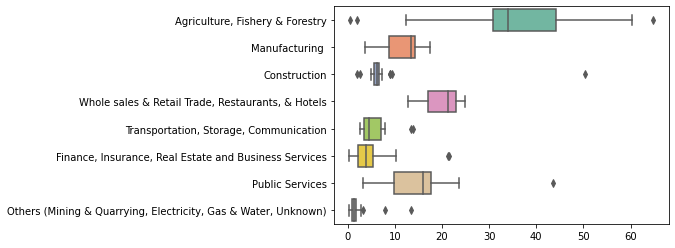

In [ ]:
#Cek outlier menggunakan boxplot
ax = sns.boxplot(data=datanum, orient="h", palette="Set2")

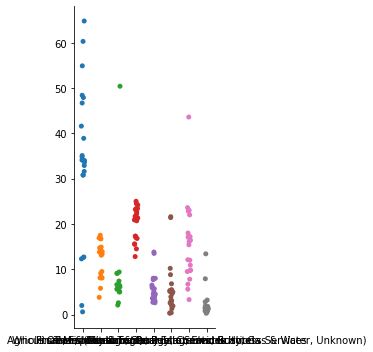

In [ ]:
# Cek outliers menggunakan catplot
p= sns.catplot(data=datanum)

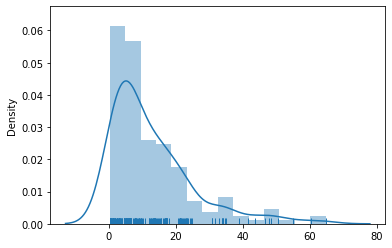

In [ ]:
# Distributions
q = sns.distplot(datanum, kde=True, rug=True)

#### Outliers pada Data Employment by Occupation

In [ ]:
dataocnum = dataoc[['Professionals, technical and related workers', 'Administrative, executive and managerial workers', 'Clerical and related workers',
                    'Sales workers and services workers', 'Agricultural, animal husbandry and forestry workers; fishermen and hunters ',
                    'Production and related workers, transport equipment operators and labourers', 'Others']]
dataocnum.head()

,"Professionals, technical and related workers","Administrative, executive and managerial workers",Clerical and related workers,Sales workers and services workers,"Agricultural, animal husbandry and forestry workers; fishermen and hunters","Production and related workers, transport equipment operators and labourers",Others
0,33.2,7.6,11.4,19.5,1.4,13.0,13.9
1,3.7,0.8,3.9,15.3,58.1,17.3,0.9
2,3.9,0.3,4.9,23.6,43.0,24.0,0.3
3,20.3,4.9,9.1,23.0,7.2,22.8,12.7
4,7.5,15.8,6.2,19.3,13.6,37.1,0.5


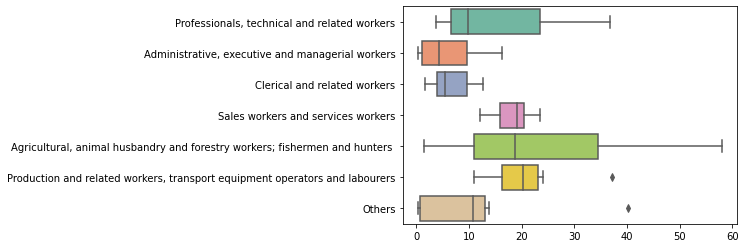

In [ ]:
#Cek outlier menggunakan boxplot
az = sns.boxplot(data=dataocnum, orient="h", palette="Set2")

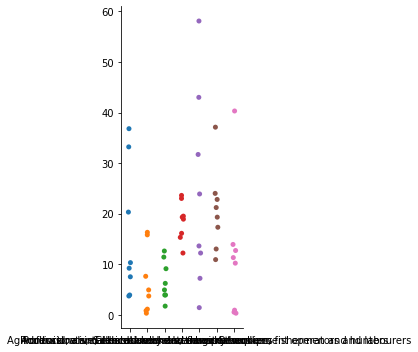

In [ ]:
# Cek outliers menggunakan catplot
q= sns.catplot(data=dataocnum)

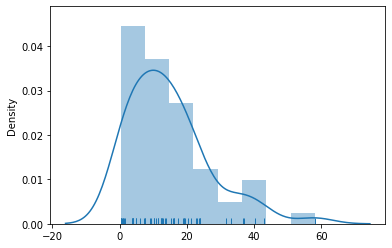

In [ ]:
# Distributions
p = sns.distplot(dataocnum, kde=True, rug=True)

### Distribusi tiap data

In [ ]:
# Distribusi tiap data Countries
datain['Countries'].value_counts()

Viet Nam             3
Thailand             3
Singapore            3
Philippines          3
Malaysia             3
Indonesia            3
Cambodia             3
Brunei Darussalam    2
Myanmar              0
Lao's PDR            0
Name: Countries, dtype: int64

In [ ]:
datain['Year(s)'].value_counts()

2014.0    7
2013.0    6
2012.0    6
2004.0    1
2003.0    1
2000.0    1
1995.0    1
Name: Year(s), dtype: int64

### Mengecek Korelasi

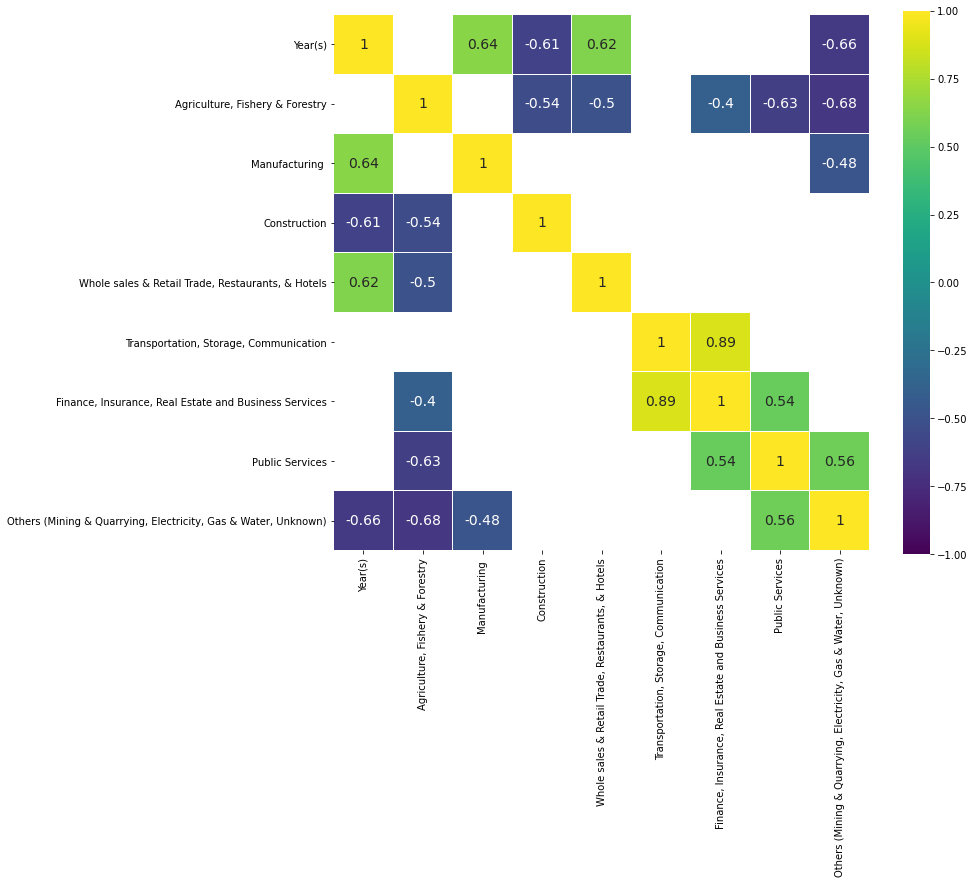

In [ ]:
# Korelasi data Employment by Industry
corr1 = datain.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr1[(corr1 >= 0.5) | (corr1 <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

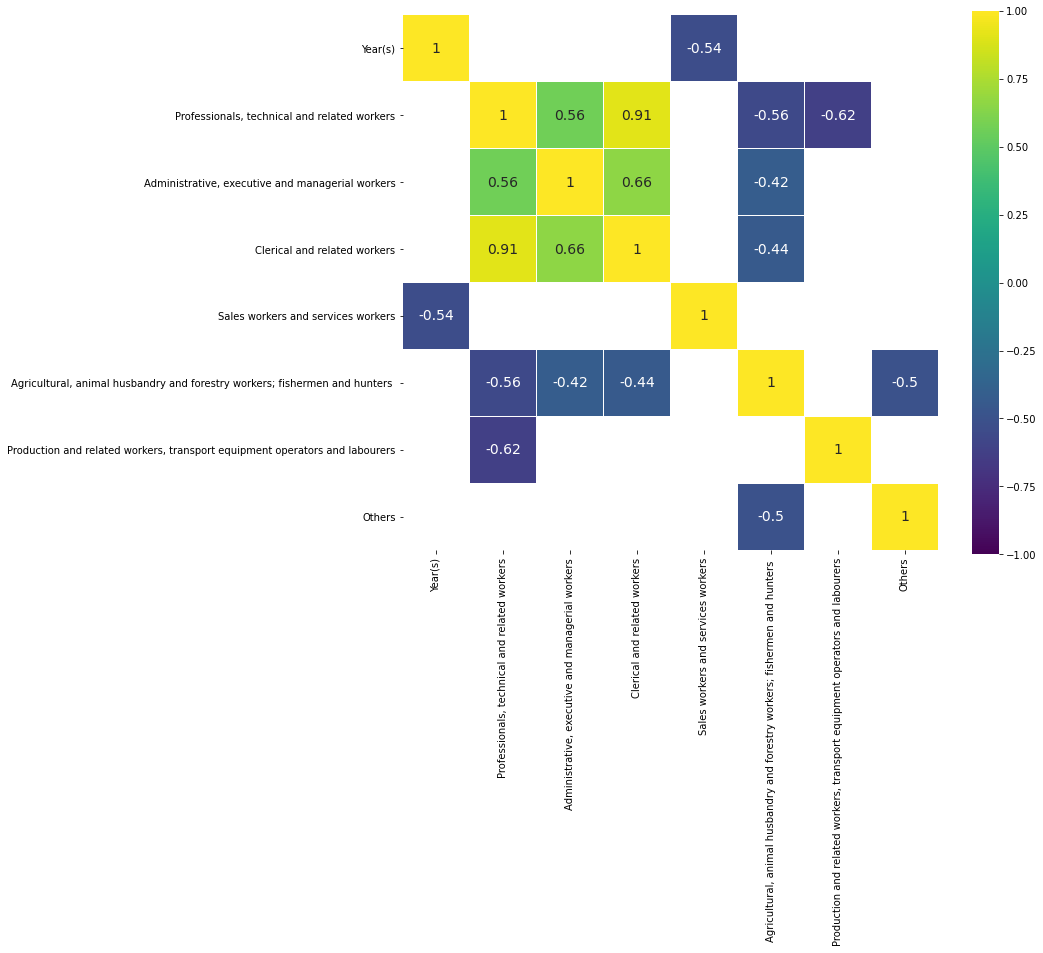

In [ ]:
# Korelasi data Employment by Occopation
corr2 = dataoc.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

## Visualisasi Data

### Data Employment by Industry

In [ ]:
datain.keys()

Index(['Countries', 'Year(s)', 'Agriculture, Fishery & Forestry',
       'Manufacturing ', 'Construction',
       'Whole sales & Retail Trade, Restaurants, & Hotels',
       'Transportation, Storage, Communication',
       'Finance, Insurance, Real Estate and Business Services',
       'Public Services',
       'Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)'],
      dtype='object')

#### Agriculture, Fishery & Forestry

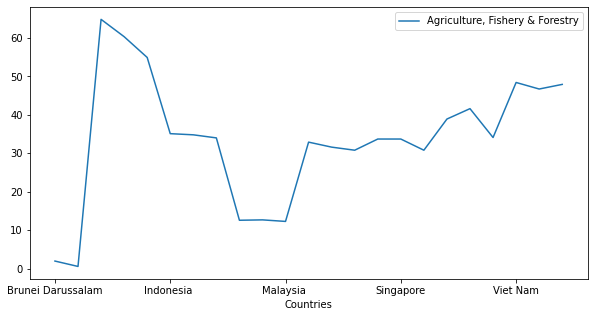

In [ ]:
datain.plot(x ='Countries', y='Agriculture, Fishery & Forestry', kind = 'line', figsize=(10, 5))

In [ ]:
aff = datain[['Countries', 'Year(s)', 'Agriculture, Fishery & Forestry']]

In [ ]:
aff.nlargest(1, 'Agriculture, Fishery & Forestry')

,Countries,Year(s),"Agriculture, Fishery & Forestry"
2,Cambodia,2003.0,64.8


In [ ]:
aff.nsmallest(1, 'Agriculture, Fishery & Forestry')

,Countries,Year(s),"Agriculture, Fishery & Forestry"
1,Brunei Darussalam,2000.0,0.6


Keterangan :
- Negara dan tahun tertinggi pada industri Agriculture, Fishery & Forestry adalah Kamboja (tahun 2003) dengan presentase 64.8%.
- Negara dan tahun terendah pada industri Agriculture, Fishery & Forestry adalah Brunei Darussalam (tahun 2000) dengan presentase 0.6%.

#### Manufacturing

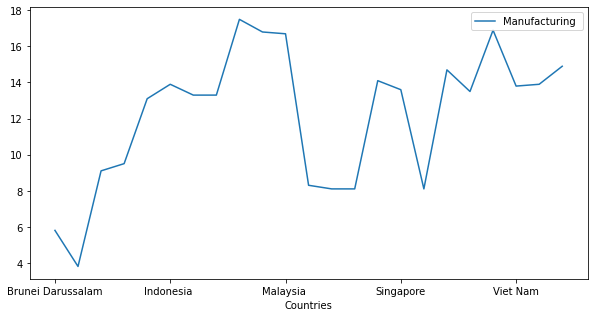

In [ ]:
datain.plot(x ='Countries', y='Manufacturing ', kind = 'line', figsize=(10, 5))

In [ ]:
manu = datain[['Countries', 'Year(s)', 'Manufacturing ']]
manu.nlargest(1, 'Manufacturing ')

,Countries,Year(s),Manufacturing
8,Malaysia,2012.0,17.5


In [ ]:
manu.nsmallest(1, 'Manufacturing ')

,Countries,Year(s),Manufacturing
1,Brunei Darussalam,2000.0,3.8


Keterangan :
- Negara dan tahun tertinggi pada industri Manufacturing adalah Malaysia (tahun 2012) dengan presentase 17.5%.
- Negara dan tahun terendah pada industri Manufacturing adalah Brunei Darussalam (tahun 2000) dengan presentase 3.8%.

#### Construction

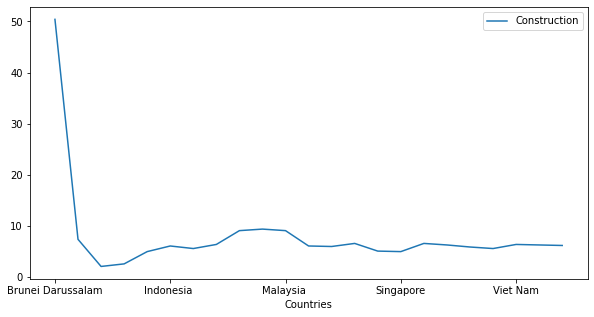

In [ ]:
datain.plot(x ='Countries', y='Construction', kind = 'line', figsize=(10, 5))

In [ ]:
cons = datain[['Countries', 'Year(s)', 'Construction']]
cons.nlargest(1, 'Construction')

,Countries,Year(s),Construction
0,Brunei Darussalam,1995.0,50.4


In [ ]:
cons.nsmallest(1, 'Construction')

,Countries,Year(s),Construction
2,Cambodia,2003.0,2.1


Keterangan :
- Negara dan tahun tertinggi pada industri Construction adalah Brunei Darussalam (tahun 1995) dengan presentase 50.4.5%.
- Negara dan tahun terendah pada industri Construction adalah Kamboja (tahun 2003) dengan presentase 2.1%.

#### Whole sales & Retail Trade, Restaurants, & Hotels

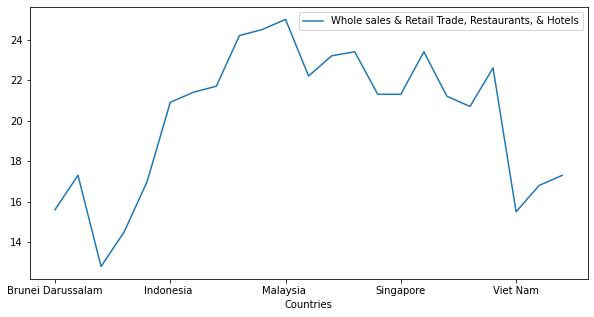

In [ ]:
datain.plot(x ='Countries', y='Whole sales & Retail Trade, Restaurants, & Hotels', kind = 'line', figsize=(10, 5))

In [ ]:
srrh = datain[['Countries', 'Year(s)', 'Whole sales & Retail Trade, Restaurants, & Hotels']]
srrh.nlargest(1, 'Whole sales & Retail Trade, Restaurants, & Hotels')

,Countries,Year(s),"Whole sales & Retail Trade, Restaurants, & Hotels"
10,Malaysia,2014.0,25.0


In [ ]:
srrh.nsmallest(1, 'Whole sales & Retail Trade, Restaurants, & Hotels')

,Countries,Year(s),"Whole sales & Retail Trade, Restaurants, & Hotels"
2,Cambodia,2003.0,12.8


Keterangan :
- Negara dan tahun tertinggi pada industri Whole sales & Retail Trade, Restaurants, & Hotels adalah Malaysia (tahun 2014) dengan presentase 25%.
- Negara dan tahun terendah pada industri Whole sales & Retail Trade, Restaurants, & Hotels adalah Kamboja (tahun 2003) dengan presentase 12.8%%.

#### Transportation, Storage, Communication

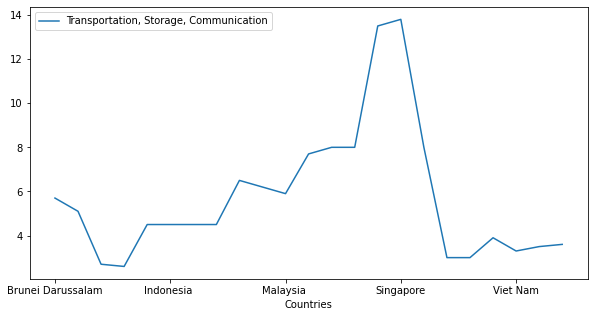

In [ ]:
datain.plot(x ='Countries', y='Transportation, Storage, Communication', kind = 'line', figsize=(10, 5))

In [ ]:
tsc = datain[['Countries', 'Year(s)', 'Transportation, Storage, Communication']]
tsc.nlargest(1, 'Transportation, Storage, Communication')

,Countries,Year(s),"Transportation, Storage, Communication"
15,Singapore,2013.0,13.8


In [ ]:
tsc.nsmallest(1, 'Transportation, Storage, Communication')

,Countries,Year(s),"Transportation, Storage, Communication"
3,Cambodia,2004.0,2.6


Keterangan :
- Negara dan tahun tertinggi pada industri Transportation, Storage, Communication adalah Singapura (tahun 2013) dengan presentase 13.8%.
- Negara dan tahun terendah pada industri Transportation, Storage, Communication adalah kamboja (tahun 2004) dengan presentase 2.6%.

#### Finance, Insurance, Real Estate and Business Services

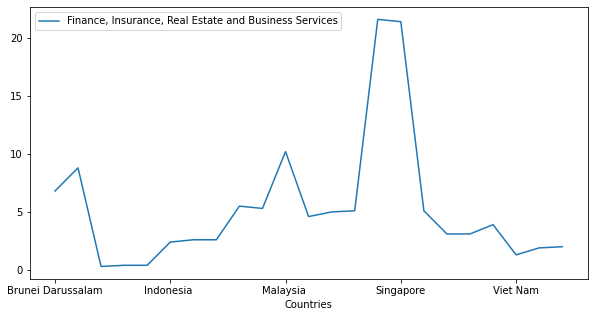

In [ ]:
datain.plot(x ='Countries', y='Finance, Insurance, Real Estate and Business Services', kind = 'line', figsize=(10, 5))

In [ ]:
firb = datain[['Countries', 'Year(s)', 'Finance, Insurance, Real Estate and Business Services']]
firb.nlargest(1, 'Finance, Insurance, Real Estate and Business Services')

,Countries,Year(s),"Finance, Insurance, Real Estate and Business Services"
14,Singapore,2012.0,21.6


In [ ]:
firb.nsmallest(1, 'Finance, Insurance, Real Estate and Business Services')

,Countries,Year(s),"Finance, Insurance, Real Estate and Business Services"
2,Cambodia,2003.0,0.3


Keterangan :
- Negara dan tahun tertinggi pada industri Finance, Insurance, Real Estate and Business Services adalah Singapure (tahun 2012) dengan presentase 21.6%.
- Negara dan tahun terendah pada industri Finance, Insurance, Real Estate and Business Services adalah Kamboja (tahun 2003) dengan presentase 0.3%.

#### Public Services

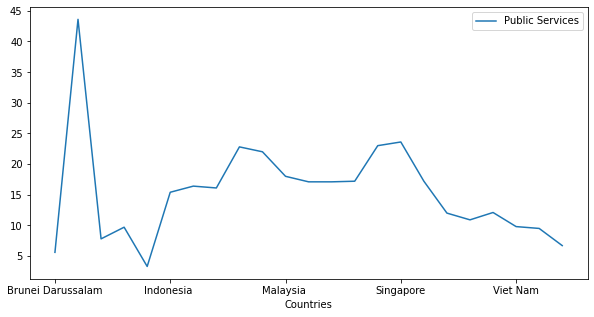

In [ ]:
datain.plot(x ='Countries', y='Public Services', kind = 'line', figsize=(10, 5))

In [ ]:
ps = datain[['Countries', 'Year(s)', 'Public Services']]
ps.nlargest(1, 'Public Services')

,Countries,Year(s),Public Services
1,Brunei Darussalam,2000.0,43.6


In [ ]:
ps.nsmallest(1, 'Public Services')

,Countries,Year(s),Public Services
4,Cambodia,2014.0,3.3


Keterangan :
- Negara dan tahun tertinggi pada industri Public Services adalah Brunei Darussalam (tahun 2000) dengan presentase 43.6%.
- Negara dan tahun terendah pada industri Public Services adalah Kamboja (tahun 2014) dengan presentase 3.3%.

#### Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)

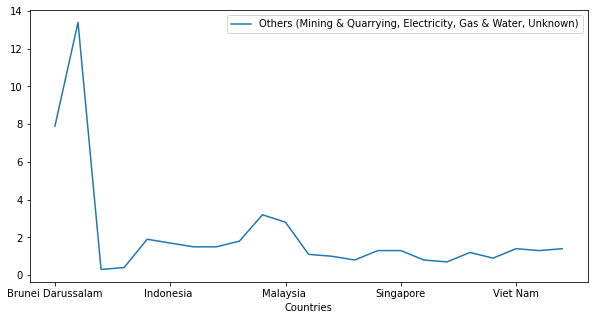

In [ ]:
datain.plot(x ='Countries', y='Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)', kind = 'line', figsize=(10, 5))

In [ ]:
others = datain[['Countries', 'Year(s)', 'Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)']]
others.nlargest(1, 'Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)')

,Countries,Year(s),"Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)"
1,Brunei Darussalam,2000.0,13.4


In [ ]:
others.nsmallest(1, 'Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)')

,Countries,Year(s),"Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)"
2,Cambodia,2003.0,0.3


Keterangan :
- Negara dan tahun tertinggi pada industri Others (Mining & Quarrying, Electricity, Gas & Water, Unknown) adalah Brunei Darussalam (tahun 2000) dengan presentase 13.4%.
- Negara dan tahun terendah pada industri Others (Mining & Quarrying, Electricity, Gas & Water, Unknown) adalah Kamboja (tahun 2003) dengan presentase 0.3%.

#### Perkembangan Industri

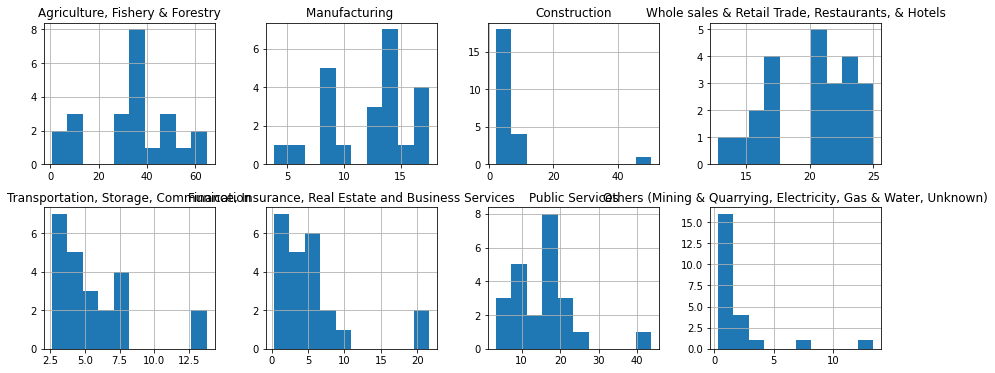

In [ ]:
num = datanum.select_dtypes(include = ['float64']).columns
datanum[num].hist(figsize=(15, 6), layout=(2, 4));

### Data Employment by Occupation

In [ ]:
dataoc.keys()

Index(['Countries', 'Year(s)', 'Professionals, technical and related workers',
       'Administrative, executive and managerial workers',
       'Clerical and related workers', 'Sales workers and services workers',
       'Agricultural, animal husbandry and forestry workers; fishermen and hunters ',
       'Production and related workers, transport equipment operators and labourers',
       'Others', 'Source'],
      dtype='object')

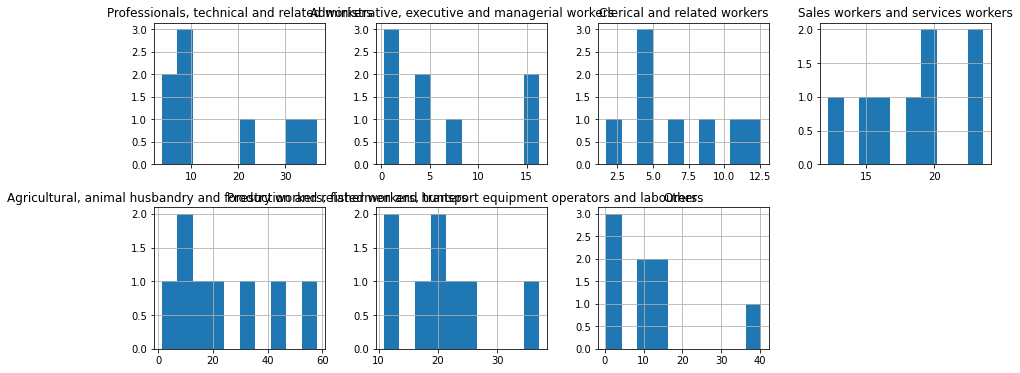

In [ ]:
num1 = dataocnum.select_dtypes(include = ['float64']).columns
dataocnum[num1].hist(figsize=(15, 6), layout=(2, 4));

#### Professionals, technical and related workers

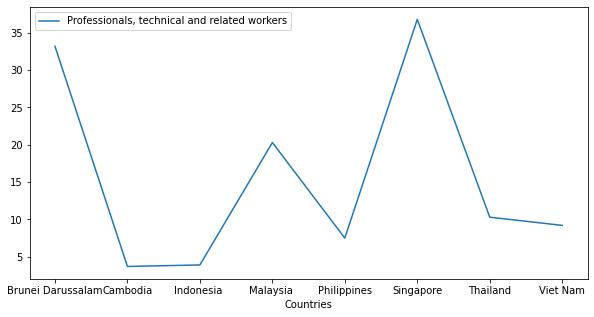

In [ ]:
dataoc.plot(x ='Countries', y='Professionals, technical and related workers', kind = 'line', figsize=(10, 5))

In [ ]:
ptr = dataoc[['Countries', 'Year(s)', 'Professionals, technical and related workers']]
ptr.nlargest(1, 'Professionals, technical and related workers')

,Countries,Year(s),"Professionals, technical and related workers"
5,Singapore,2014.0,36.8


In [ ]:
ptr.nsmallest(1, 'Professionals, technical and related workers')

,Countries,Year(s),"Professionals, technical and related workers"
1,Cambodia,2014.0,3.7


Keterangan :
- Negara dan tahun tertinggi dengan jumlah pekerjaan sebagai Professionals, technical and related workers adalah Singapure (tahun 2014) dengan presentase 36.8%.
- Negara dan tahun terendah dengan jumlah pekerjaan sebagai Professionals, technical and related workers adalah Kamboja (tahun 2014) dengan presentase 3.7%.

#### Administrative, executive and managerial workers

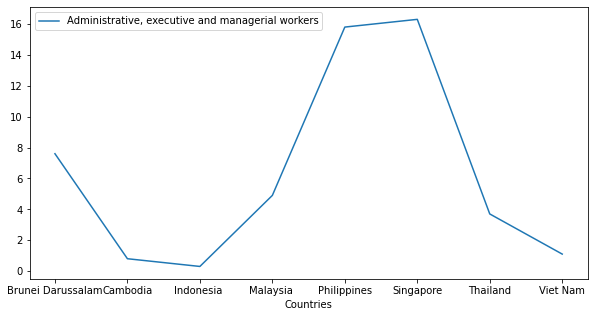

In [ ]:
dataoc.plot(x ='Countries', y='Administrative, executive and managerial workers', kind = 'line', figsize=(10, 5))

In [ ]:
aem = dataoc[['Countries', 'Year(s)', 'Administrative, executive and managerial workers']]
aem.nlargest(1, 'Administrative, executive and managerial workers')

,Countries,Year(s),"Administrative, executive and managerial workers"
5,Singapore,2014.0,16.3


In [ ]:
aem.nsmallest(1, 'Administrative, executive and managerial workers')

,Countries,Year(s),"Administrative, executive and managerial workers"
2,Indonesia,1999.0,0.3


Keterangan :
- Negara dan tahun tertinggi dengan jumlah pekerjaan sebagai Administrative, executive and managerial workers adalah Singapure (tahun 2014) dengan presentase 16.3%.
- Negara dan tahun terendah dengan jumlah pekerjaan sebagai Administrative, executive and managerial workers adalah Indonesia (tahun 1999) dengan presentase 0.3%.

#### Clerical and related workers

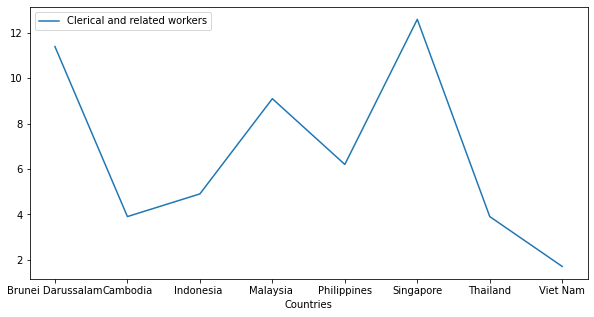

In [ ]:
dataoc.plot(x ='Countries', y='Clerical and related workers', kind = 'line', figsize=(10, 5))

In [ ]:
cr = dataoc[['Countries', 'Year(s)', 'Clerical and related workers']]
cr.nlargest(1, 'Clerical and related workers')

,Countries,Year(s),Clerical and related workers
5,Singapore,2014.0,12.6


In [ ]:
cr.nsmallest(1, 'Clerical and related workers')

,Countries,Year(s),Clerical and related workers
7,Viet Nam,2014.0,1.7


Keterangan :
- Negara dan tahun tertinggi dengan jumlah pekerjaan sebagai Clerical and related workers adalah Singapure (tahun 2014) dengan presentase 12.6%.
- Negara dan tahun terendah dengan jumlah pekerjaan sebagai Clerical and related workers adalah Vietnam (tahun 2014) dengan presentase 1.7%.

#### Sales workers and services workers

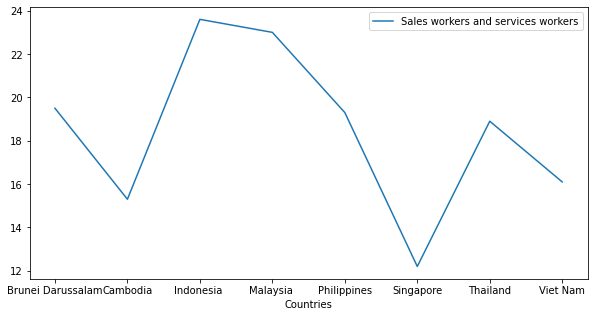

In [ ]:
dataoc.plot(x ='Countries', y='Sales workers and services workers', kind = 'line', figsize=(10, 5))

In [ ]:
ss = dataoc[['Countries', 'Year(s)', 'Sales workers and services workers']]
ss.nlargest(1, 'Sales workers and services workers')

,Countries,Year(s),Sales workers and services workers
2,Indonesia,1999.0,23.6


In [ ]:
ss.nsmallest(1, 'Sales workers and services workers')

,Countries,Year(s),Sales workers and services workers
5,Singapore,2014.0,12.2


Keterangan :
- Negara dan tahun tertinggi dengan jumlah pekerjaan sebagai Sales workers and services workers adalah Indonesia (tahun 1999) dengan presentase 23.6%.
- Negara dan tahun terendah dengan jumlah pekerjaan sebagai Sales workers and services workers adalah Singapure (tahun 2014) dengan presentase 12.2%.

#### Agricultural, animal husbandry and forestry workers; fishermen and hunters

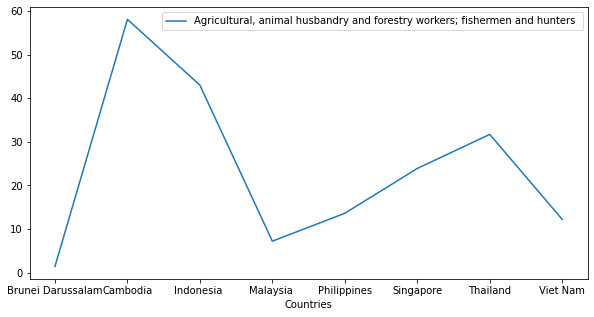

In [ ]:
dataoc.plot(x ='Countries', y='Agricultural, animal husbandry and forestry workers; fishermen and hunters ', kind = 'line', figsize=(10, 5))

In [ ]:
aaf = dataoc[['Countries', 'Year(s)', 'Agricultural, animal husbandry and forestry workers; fishermen and hunters ']]
aaf.nlargest(1, 'Agricultural, animal husbandry and forestry workers; fishermen and hunters ')

,Countries,Year(s),"Agricultural, animal husbandry and forestry workers; fishermen and hunters"
1,Cambodia,2014.0,58.1


In [ ]:
aaf.nsmallest(1, 'Agricultural, animal husbandry and forestry workers; fishermen and hunters ')

,Countries,Year(s),"Agricultural, animal husbandry and forestry workers; fishermen and hunters"
0,Brunei Darussalam,2014.0,1.4


Keterangan :
- Negara dan tahun tertinggi dengan jumlah pekerjaan sebagai Agricultural, animal husbandry and forestry workers; fishermen and hunters adalah Kamboja (tahun 2014) dengan presentase 58.1%.
- Negara dan tahun terendah dengan jumlah pekerjaan sebagai Agricultural, animal husbandry and forestry workers; fishermen and hunters adalah Brunei Darussalam (tahun 2014) dengan presentase 1.4%.

#### Production and related workers, transport equipment operators and labourers

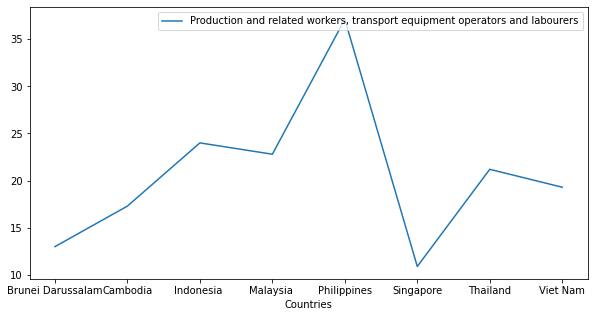

In [ ]:
dataoc.plot(x ='Countries', y='Production and related workers, transport equipment operators and labourers', kind = 'line', figsize=(10, 5))

In [ ]:
prt = dataoc[['Countries', 'Year(s)', 'Production and related workers, transport equipment operators and labourers']]
prt.nlargest(1, 'Production and related workers, transport equipment operators and labourers')

,Countries,Year(s),"Production and related workers, transport equipment operators and labourers"
4,Philippines,2014.0,37.1


In [ ]:
prt.nsmallest(1, 'Production and related workers, transport equipment operators and labourers')

,Countries,Year(s),"Production and related workers, transport equipment operators and labourers"
5,Singapore,2014.0,10.9


Keterangan :
- Negara dan tahun tertinggi dengan jumlah pekerjaan sebagai Production and related workers, transport equipment operators and labourers adalah Filipina (tahun 2014) dengan presentase 37.1%.
- Negara dan tahun terendah dengan jumlah pekerjaan sebagai Production and related workers, transport equipment operators and labourers adalah Singapore (tahun 2014) dengan presentase 10.9%.

#### Others

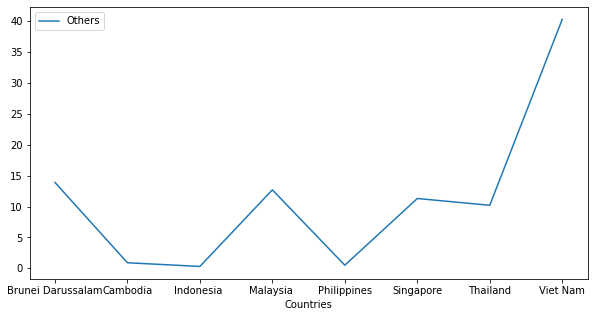

In [ ]:
dataoc.plot(x ='Countries', y='Others', kind = 'line', figsize=(10, 5))

In [ ]:
ot = dataoc[['Countries', 'Year(s)', 'Others']]
ot.nlargest(1, 'Others')

,Countries,Year(s),Others
7,Viet Nam,2014.0,40.3


In [ ]:
ot.nsmallest(1, 'Others')

,Countries,Year(s),Others
2,Indonesia,1999.0,0.3


Keterangan :
- Negara dan tahun tertinggi dengan jumlah pekerjaan lainnya adalah Vietnam (tahun 2014) dengan presentase 40.3%.
- Negara dan tahun terendah dengan jumlah pekerjaan lainnya adalah Indonesia (tahun 1999) dengan presentase 0.3%.

### Perkembangan Industri setiap Negara

#### Brunei Darussalam

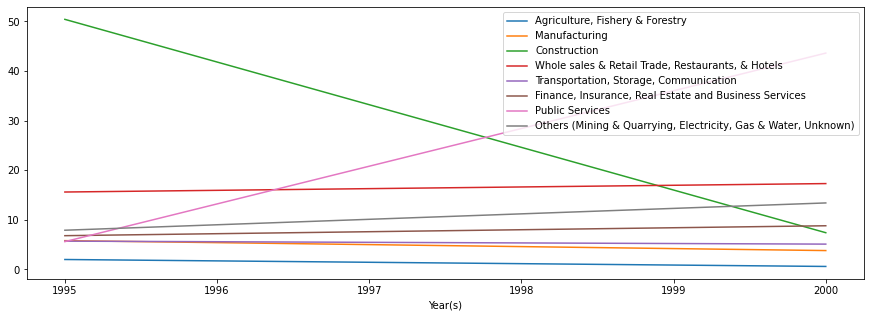

In [ ]:
brunei = datain[:2]
brunei.plot(x ='Year(s)', kind = 'line', figsize=(15, 5))

Keterangan :
- Terdapat penurunan yang cukup signifikan pada industri *Construction* dari tahun 1995 ke tahun 2000 di Brunei.
- Terjadi kenaikan pada industri *Public Services* di brunei dari tahun 1995 ke tahun 2000.

#### Kamboja

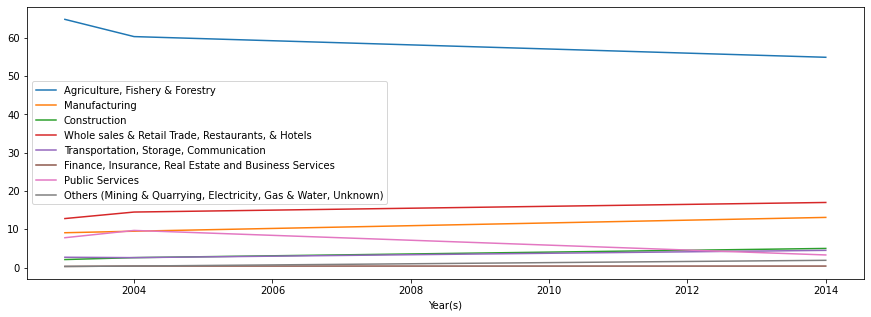

In [ ]:
kamboja = datain[2:5]
kamboja.plot(x ='Year(s)', kind = 'line', figsize=(15, 5))

Keterangan :
- Di Kamboja tidak terdapat kenaikan ataupun penurunan yang signifikan.

#### Indonesia

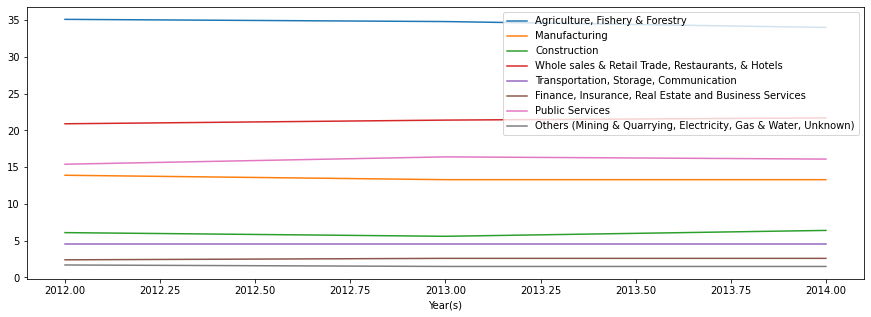

In [ ]:
idn = datain[5:8]
idn.plot(x ='Year(s)', kind = 'line', figsize=(15, 5))

Keterangan :
- Di Indonesia tidak terdapat kenaikan ataupun penurunan yang signifikan.

#### Malaysia

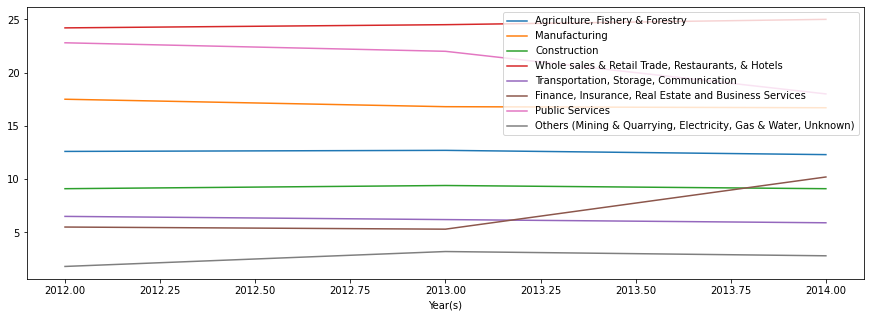

In [ ]:
malay = datain[8:11]
malay.plot(x ='Year(s)', kind = 'line', figsize=(15, 5))

Keterangan :
- Pada tahun 2013 terjadi penurunan pekerjaan di industri *Public Services*.
- Di tahun yang sama juga terjadi kenaikan di industri *Finance, Insurance, Real Estate and Business Services*.

#### Philippines

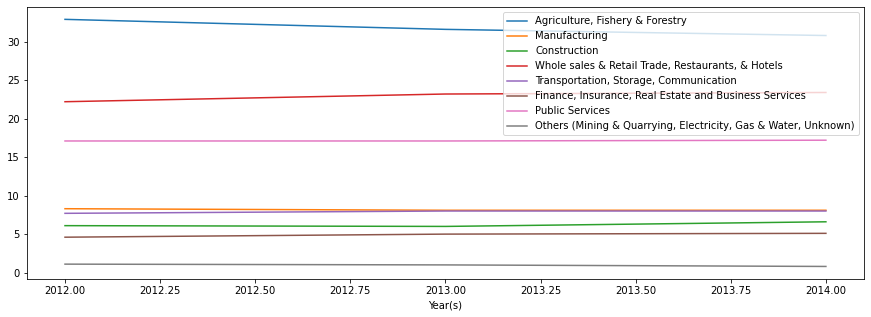

In [ ]:
philipines = datain[11:14]
philipines.plot(x ='Year(s)', kind = 'line', figsize=(15, 5))

Keterangan :
- Di Filipina tidak terdapat kenaikan ataupun penurunan yang signifikan.

#### Singapure

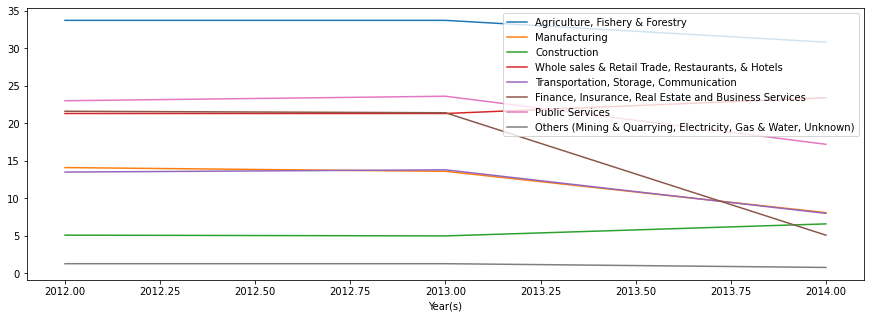

In [ ]:
singapure = datain[14:17]
singapure.plot(x ='Year(s)', kind = 'line', figsize=(15, 5))

Keterangan :
- Pada tahun 2013 terjadi beberapa penurunan pekerjaan di Singapure, namun yang paling signifikan terdapat pada industri *Public Services* dan industri *Finance, Insurance, Real Estate and Business Services*.
- Di tahun yang sama juga terjadi peningkatan di industri *Construction* namun tidak terlalu signifikan.

#### Thailand

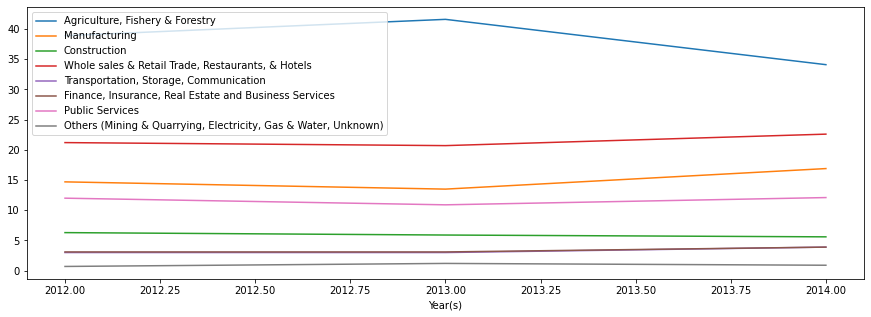

In [ ]:
thailand = datain[17:20]
thailand.plot(x ='Year(s)', kind = 'line', figsize=(15, 5))

Keterangan :
- Terjadi penurunan yang signifikan pada perkerjaan di industri *Agriculture, Fishery & Forestry* pada tahun 2013.
- Ada kenaikan pada industri *Manufacturing* walau tidak terlalu signifikan.

Vietnam

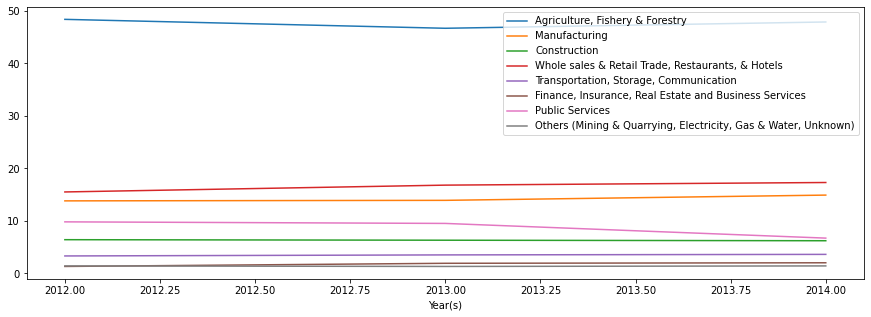

In [ ]:
vietnam = datain[20:23]
vietnam.plot(x ='Year(s)', kind = 'line', figsize=(15, 5))

Keterangan :
- Di Filipina tidak terdapat kenaikan ataupun penurunan yang signifikan.

## MODELING

### Fuzzy C-Mean Clustering

In [ ]:
pip install fuzzy-c-means

In [ ]:
import sys
sys.path.insert(0,'FuzzyCM')
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

#### Clustering data Employment in Occupation

In [ ]:
x = datain[['Agriculture, Fishery & Forestry', 'Manufacturing ', 'Construction', 'Whole sales & Retail Trade, Restaurants, & Hotels',
           'Transportation, Storage, Communication', 'Finance, Insurance, Real Estate and Business Services', 'Public Services',
           'Others (Mining & Quarrying, Electricity, Gas & Water, Unknown)']].values
y = datain['Countries'].values
print(x.shape)

(23, 8)


In [ ]:
x

array([[ 2.       ,  5.8      , 50.4      , 15.6      ,  5.7      ,
         6.8      ,  5.6      ,  7.9      ],
       [ 0.6      ,  3.8      ,  7.4      , 17.3      ,  5.1      ,
         8.8      , 43.6      , 13.4      ],
       [64.8      ,  9.1      ,  2.1      , 12.8      ,  2.7      ,
         0.3      ,  7.8      ,  0.3      ],
       [60.3      ,  9.5      ,  2.6      , 14.5      ,  2.6      ,
         0.4      ,  9.7      ,  0.4      ],
       [54.9      , 13.1      ,  5.       , 17.       ,  4.5      ,
         0.4      ,  3.3      ,  1.9      ],
       [35.1      , 13.9      ,  6.1      , 20.9      ,  4.5      ,
         2.4      , 15.4      ,  1.7      ],
       [34.8      , 13.3      ,  5.6      , 21.4      ,  4.5      ,
         2.6      , 16.4      ,  1.5      ],
       [34.       , 13.3      ,  6.4      , 21.7      ,  4.5      ,
         2.6      , 16.1      ,  1.5      ],
       [12.6      , 17.5      ,  9.1      , 24.2      ,  6.5      ,
         5.5      , 22.8    

In [ ]:
y

['Brunei Darussalam', 'Brunei Darussalam', 'Cambodia', 'Cambodia', 'Cambodia', ..., 'Thailand', 'Thailand', 'Viet Nam', 'Viet Nam', 'Viet Nam']
Length: 23
Categories (10, object): ['Brunei Darussalam', 'Cambodia', 'Indonesia ', 'Lao's PDR', ..., 'Philippines',
                          'Singapore', 'Thailand', 'Viet Nam']

In [ ]:
fcm = FCM(n_clusters=3, m= 2, max_iter=5, error=0.1)
fcm.fit(x)

In [ ]:
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

In [ ]:
fcm_centers

DeviceArray([[24.599485 , 11.852154 ,  9.303633 , 21.85894  ,  7.12488  ,
               7.45491  , 19.346403 ,  2.7178378],
             [45.67714  , 13.261068 ,  6.168082 , 17.9488   ,  3.6213198,
               2.400846 , 10.028041 ,  1.3634825],
             [27.604885 , 11.421071 ,  8.536863 , 21.756397 ,  6.9917917,
               6.7217946, 18.390432 ,  2.311504 ]], dtype=float32)

In [ ]:
fcm_labels

DeviceArray([0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2,
             1, 1, 1], dtype=int32)

In [ ]:
datain['Clustering'] = fcm_labels
datain

In [ ]:
# plot result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(x[:,0], x[:,1], ax=axes[0])
scatter(x[:,0], x[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
plt.show()

In [ ]:
datain_df = datain[['Countries', 'Year(s)', 'Clustering']]

In [ ]:
datain_df

Keterangan :
- Indonesia, Philipina, dan Singapura selama 3 tahun yaitu pada tahun 2012-2014 memiliki presentasi pekerjaan menurut industrinya lebih baik daripada negara ASEAN lainnya.
- Thailand memiliki presentasi pekerjaan menurut industri menjadi lebih baik pada tahun 2014.
- Kamboja dan Vietnam selama 3 tahun yaitu pada tahun 2012-2014 memiliki presentasi pekerjaan menurut industrinya baik di ASEAN.
- Brunei Darussalam dan Malaysia selama 3 tahun yaitu pada tahun 2012-2014 memiliki presentasi yang cukup dalam pekerjaan yang menurut industrinya di ASEAN.

#### Clustering data Employment in Occupation

In [ ]:
X = dataoc[['Professionals, technical and related workers', 'Administrative, executive and managerial workers', 'Clerical and related workers',
            'Sales workers and services workers', 'Agricultural, animal husbandry and forestry workers; fishermen and hunters ',
            'Production and related workers, transport equipment operators and labourers','Others']].values
Y = dataoc['Countries'].values
print(X.shape)

In [ ]:
X

In [ ]:
Y

In [ ]:
fcm1 = FCM(n_clusters=3, m= 2, max_iter=5, error=0.1)
fcm1.fit(X)

In [ ]:
fcm_centers1 = fcm1.centers
fcm_labels1  = fcm1.u.argmax(axis=1)

In [ ]:
fcm_centers1

In [ ]:
fcm_labels1

In [ ]:
dataoc['Clustering'] = fcm_labels1
dataoc

In [ ]:
# plot result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(X[:,0], X[:,1], ax=axes[0])
scatter(X[:,0], X[:,1], ax=axes[1], hue=fcm_labels1)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
plt.show()

In [ ]:
dataoc_df = dataoc[['Countries', 'Year(s)', 'Clustering']]
dataoc_df

Keterangan :
- Dengan data kamboja dan Thailand pada tahun 2014 memiliki presentasi jumlah pekerja yang sangat rata kesemuan aspek bidang pekerjaan di ASEAN.
- Dengan data 1999, Indonesia memiliki presentasi jumlah pekerja sangat rata untuk kesemuan aspek bidang pekerjaan di ASEAN.
- Dengan data Philipina dan Vietnam pada tahun 2014 memiliki presentasi jumlah pekerja yang rata ke semua aspek bidang pekerjan di ASEAN.
- Untuk Singapura dan Malaysia pada data 2014 presentasi yang dimiliki belum
rata kepada asepek bidang pekerjaan di negara tersebut dibanding negara ASEAN lainnya.
